In [43]:
pip install numpy pandas statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./filtered_data.csv')

df = df.filter[]


In [45]:
df

,Label,Month,Year,Close (Rs.),Loan Rate
0,ACL.N0000,1,2000,49.250000,13.39
1,ACL.N0000,1,2001,29.208333,23.00
2,ACL.N0000,1,2002,31.833333,14.00
3,ACL.N0000,1,2003,41.783333,11.00
4,ACL.N0000,1,2004,32.062500,8.50
...,...,...,...,...,...
33791,WAPO.N0000,7,2023,22.127273,12.00
33792,WAPO.N0000,8,2023,31.795238,12.00
33793,YORK.N0000,7,2023,153.075000,12.00
33794,YORK.N0000,8,2023,170.394737,12.00


In [46]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

coint_result = coint_johansen(df[['Close (Rs.)', 'Loan Rate']], det_order=1, k_ar_diff=1)

In [47]:
rank = select_coint_rank(df[['Close (Rs.)', 'Loan Rate']], det_order=1, k_ar_diff=1)

In [48]:
# Determine the cointegration rank using the select_coint_rank function
rank = select_coint_rank(df[['Close (Rs.)', 'Loan Rate']], det_order=1, k_ar_diff=1)

# Extract the rank value (ensure it is an integer)
rank_value = rank.rank

# Now, create and fit the VECM model using the extracted rank
model = VECM(df[['Close (Rs.)', 'Loan Rate']], k_ar_diff=1, coint_rank=rank_value)
result = model.fit()

In [49]:
result

In [50]:
# Perform residual diagnostics
resid = result.resid

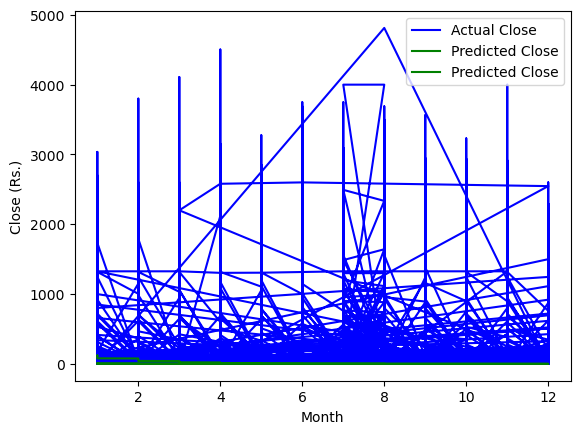

In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'your_data.csv' with your data file)
df = pd.read_csv('./filtered_data.csv')

# Select the relevant columns for the VECM, e.g., "Close (Rs.)" and "Loan Rate"
data = df[['Close (Rs.)', 'Loan Rate']]

# Determine the cointegration rank using the Johansen test
rank = select_coint_rank(data, det_order=1, k_ar_diff=1)
rank = int(rank.rank)

# Create and fit the VECM model
model = VECM(data, k_ar_diff=1, coint_rank=rank)
result = model.fit()

# Extract the predicted values for the "Close (Rs.)" variable
predicted_close = result.predict(steps=len(df))

# Plot the actual close values
plt.plot(df['Month'], df['Close (Rs.)'], label='Actual Close', color='blue')

# Plot the predicted close values
plt.plot(df['Month'], predicted_close, label='Predicted Close', color='green')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Close (Rs.)')
plt.legend()

# Show the plot
plt.show()

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


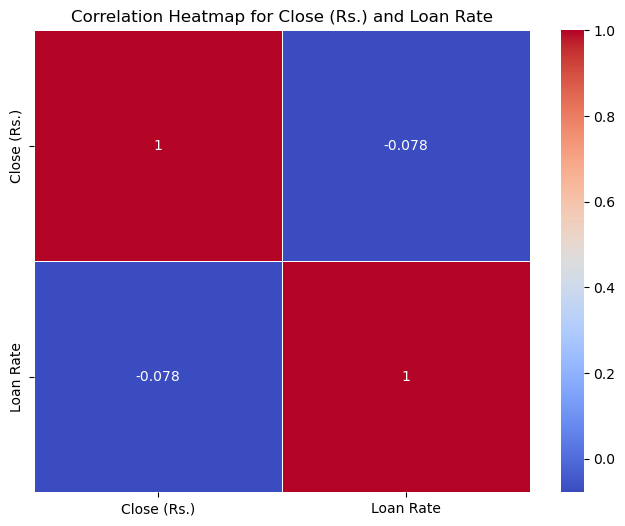

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'your_data.csv' with your data file)
df = pd.read_csv('./final_share_value_loan_rate.csv')

# Select the relevant columns for the heatmap
data = df[['Close (Rs.)', 'Loan Rate']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Close (Rs.) and Loan Rate')
plt.show()